In [1]:
import os
import pandas as pd
import ast

In [21]:
folder_path = r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\logs\SOOTOPOLIS CITY inner battle area track'
files = os.listdir(folder_path)

In [22]:
data_frames = []  # 存储每个文件的 DataFrame

for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith('.csv'):  # 假设文件是以.csv结尾的
        df = pd.read_csv(file_path, delimiter=';')  # 读取文件为 DataFrame
        data_frames.append(df)  # 将 DataFrame 添加到列表中

# 合并所有 DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)

In [4]:
merged_df

,game_status,enemy_status,state_dict,memory_coords,memory_battle_status,timestamp
0,{'return_status': 0},{'enemy_count': 0},{},"{'x_coords': 16, 'y_coords': 49, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09
1,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': 0},{},"{'x_coords': 16, 'y_coords': 49, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09
2,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 16, 'y_coords': 49, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09
3,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 16, 'y_coords': 49, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09
4,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 16, 'y_coords': 49, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09
...,...,...,...,...,...,...
891,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'SOOTOPROUS Chachi\n', 'money': '7...","{'x_coords': 35, 'y_coords': 28, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09
892,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'SOOTOPROUS Chachi\n', 'money': '7...","{'x_coords': 35, 'y_coords': 28, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09
893,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'SOOTOPROUS Chachi\n', 'money': '7...","{'x_coords': 35, 'y_coords': 28, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09
894,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'a, we i\n', 'money': '72\n'}","{'x_coords': 35, 'y_coords': 28, 'map_number':...","{'player_info_not_sure_address': 3938603168, '...",1.685072e+09


In [5]:
df=merged_df.copy()

In [6]:
# 将字符串转换为字典格式
df['memory_coords'] = df['memory_coords'].apply(ast.literal_eval)
df['game_status'] = df['game_status'].apply(ast.literal_eval)

# 提取 "x_coords"、"y_coords" 和 "map_number" 到新列
df['x_coords'] = df['memory_coords'].apply(lambda x: x.get('x_coords'))
df['y_coords'] = df['memory_coords'].apply(lambda x: x.get('y_coords'))
df['map_number'] = df['memory_coords'].apply(lambda x: x.get('map_number'))
df['face_dir']=df['memory_coords'].apply(lambda x: x.get('face_dir'))
df['transport']=df['memory_coords'].apply(lambda x: x.get('transport'))



In [7]:
f = df.drop(['memory_coords'], axis=1)
df = df.drop(['game_status', 'enemy_status', 'state_dict', 'memory_battle_status'], axis=1)


In [8]:
df = df.drop(['timestamp', 'memory_coords'], axis=1)

In [9]:
# 拆分 "map_number" 列
df[['map_num_1', 'map_num_2', 'map_num_3']] = pd.DataFrame(df['map_number'].tolist())

# 删除原始的 "map_number" 列
df = df.drop(['map_number'], axis=1)


In [10]:
df

,x_coords,y_coords,face_dir,transport,map_num_1,map_num_2,map_num_3
0,16,49,2,0,1,7,50
1,16,49,2,0,1,7,50
2,16,49,2,0,1,7,50
3,16,49,2,0,1,7,50
4,16,49,2,0,1,7,50
...,...,...,...,...,...,...,...
891,35,28,3,0,1,7,50
892,35,28,2,0,1,7,50
893,35,28,2,0,1,7,50
894,35,28,2,0,1,7,50


In [11]:
# 计算数值列的统计信息
numeric_cols = ['x_coords', 'y_coords', 'map_num_1', 'map_num_2', 'map_num_3','face_dir','transport']
statistics = df[numeric_cols].describe()
print(statistics)


         x_coords    y_coords  map_num_1  map_num_2  map_num_3  transport
count  896.000000  896.000000      896.0      896.0      896.0      896.0
mean    30.988839   37.703125        1.0        7.0       50.0        0.0
std      8.163407    8.848005        0.0        0.0        0.0        0.0
min     16.000000   24.000000        1.0        7.0       50.0        0.0
25%     26.000000   29.000000        1.0        7.0       50.0        0.0
50%     32.000000   37.000000        1.0        7.0       50.0        0.0
75%     36.000000   46.000000        1.0        7.0       50.0        0.0
max     48.000000   55.000000        1.0        7.0       50.0        0.0


In [12]:
# 计算数值列之间的相关系数
correlation = df[numeric_cols].corr()
print(correlation)


           x_coords  y_coords  map_num_1  map_num_2  map_num_3  face_dir   
x_coords   1.000000  0.057158        NaN        NaN        NaN  0.098700  \
y_coords   0.057158  1.000000        NaN        NaN        NaN  0.018534   
map_num_1       NaN       NaN        NaN        NaN        NaN       NaN   
map_num_2       NaN       NaN        NaN        NaN        NaN       NaN   
map_num_3       NaN       NaN        NaN        NaN        NaN       NaN   
face_dir   0.098700  0.018534        NaN        NaN        NaN  1.000000   
transport       NaN       NaN        NaN        NaN        NaN       NaN   

           transport  
x_coords         NaN  
y_coords         NaN  
map_num_1        NaN  
map_num_2        NaN  
map_num_3        NaN  
face_dir         NaN  
transport        NaN  


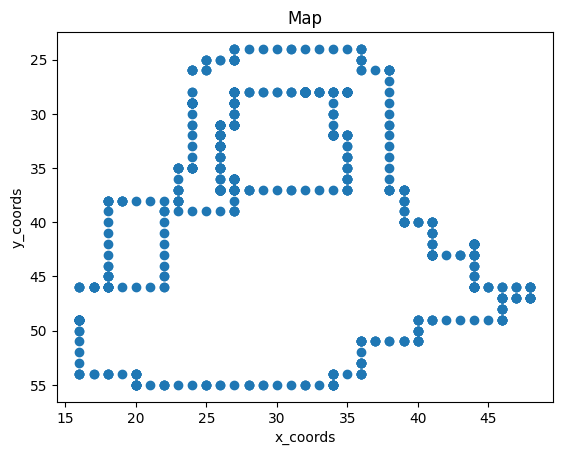

In [13]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots()

# 绘制散点图
ax.scatter(df['x_coords'], df['y_coords'])

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('x_coords')
ax.set_ylabel('y_coords')

# 设置标题
ax.set_title('Map')

# 显示图形
plt.show()


NameError: name 'ConvexHull' is not defined

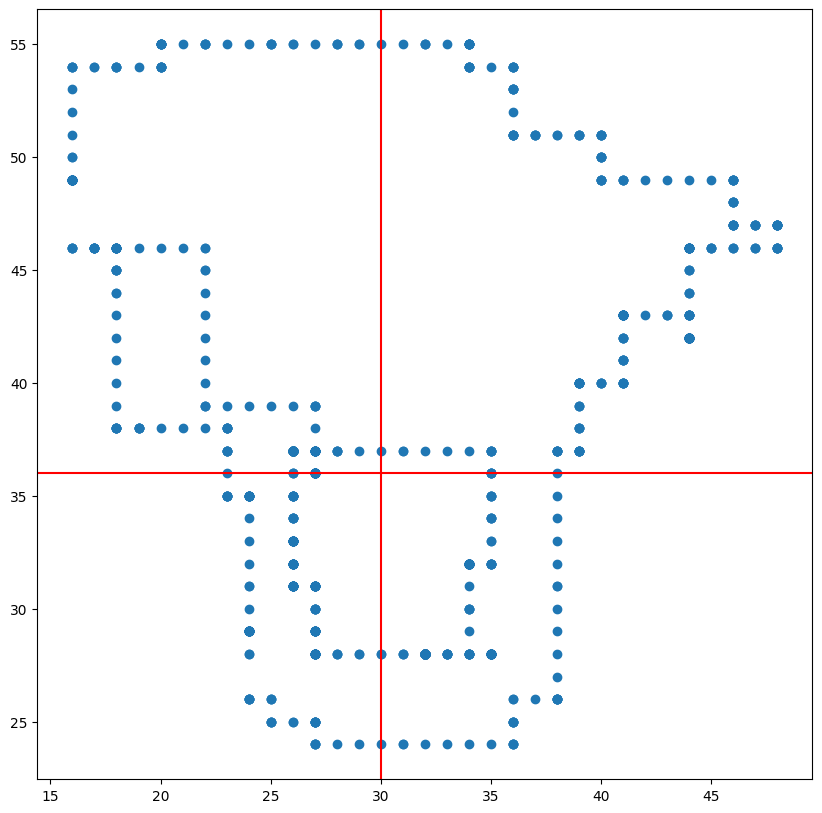

In [14]:
points = df[['x_coords', 'y_coords']].to_numpy()

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 画出以30，36为中心的垂直线和水平线
plt.axhline(y=36, color='r', linestyle='-')
plt.axvline(x=30, color='r', linestyle='-')

# 画出点，代表你的数据
plt.scatter(df['x_coords'], df['y_coords'])

# 计算凸包
hull = ConvexHull(points)

# 画出凸包的边界线
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# 设定坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()

In [15]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)

# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['y_coords'].min()), int(df['y_coords'].max()) + 1),
                       columns=np.arange(int(df['x_coords'].min()), int(df['x_coords'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['y_coords']), int(row['x_coords'])] = 1

# # 反转y轴
# grid_df = grid_df.iloc[::-1]

# 导出到Excel
#grid_df.to_excel("coordinates.xlsx")

NameError: name 'np' is not defined

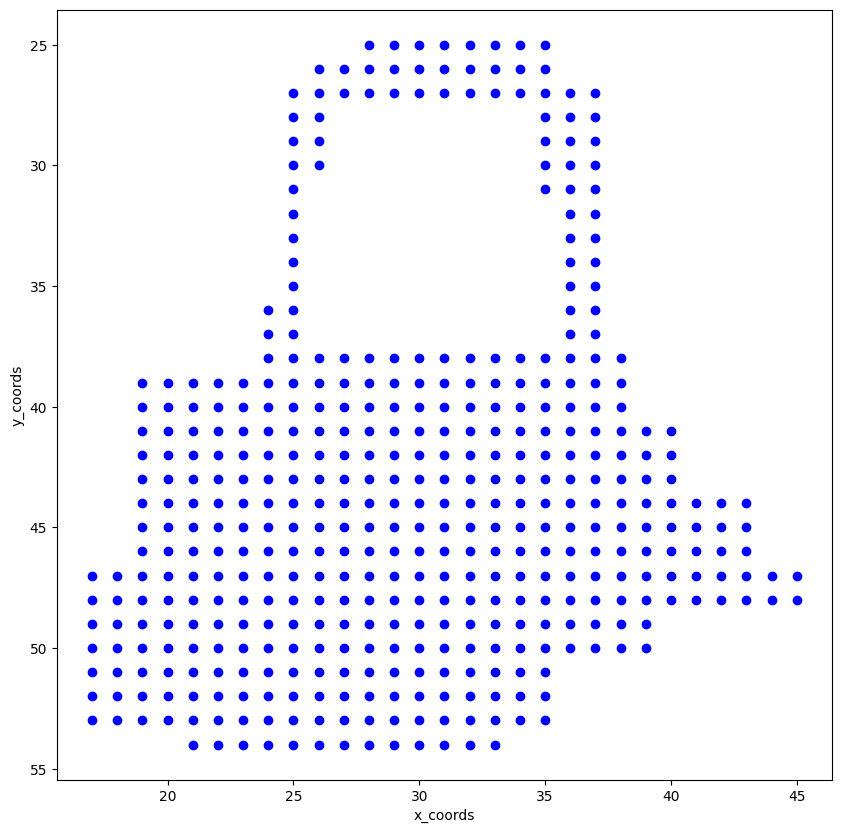

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel("coordinates copy.xlsx", index_col=0)

# 反转y轴
df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values == 1)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 画出散点图
plt.scatter(x_coords, y_coords, color='b')
# y轴反转
plt.gca().invert_yaxis()
# 设定坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


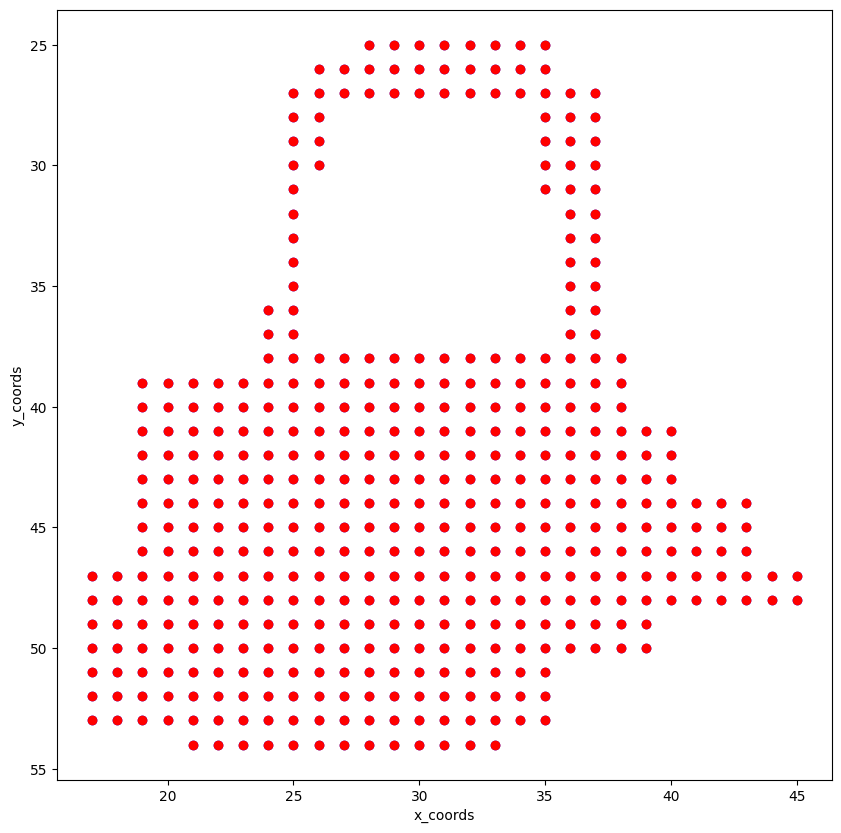

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel("coordinates copy.xlsx", index_col=0)

# # 根据提供的坐标和方向，找到并标记第一个点为2
# directions = [(16, 24, 'y', 1), (16, 24, 'x', 1), (16, 55, 'x', 1), (48, 55, 'y', -1)]
# for x, y, axis, direction in directions:
#     if axis == 'x':
#         point = df.loc[y, x:] if direction == 1 else df.loc[y, :x].iloc[::-1]
#     else:
#         point = df.loc[y:, x] if direction == 1 else df.loc[:y, x].iloc[::-1]
#     first_point = point.idxmax()
#     if axis == 'x':
#         df.at[y, first_point] = 2
#     else:
#         df.at[first_point, x] = 2

# # 反转y轴
# df = df.iloc[::-1]

# # 获取值为1和2的单元格的坐标
# coords_1 = np.argwhere(df.values == 1)
# x_coords_1 = df.columns[coords_1[:, 1]].values
# y_coords_1 = df.index[coords_1[:, 0]].values

# coords_2 = np.argwhere(df.values == 2)
# x_coords_2 = df.columns[coords_2[:, 1]].values
# y_coords_2 = df.index[coords_2[:, 0]].values

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 画出散点图
plt.scatter(x_coords, y_coords, color='b')
plt.scatter(x_coords, y_coords, color='r')

# y轴反转
plt.gca().invert_yaxis()

# 设定坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


In [18]:
# 打印DataFrame的列索引
print(df.columns)

# 打印DataFrame的行索引
print(df.index)


Index([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype='int64')
Index([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55],
      dtype='int64')


In [19]:
# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 画出散点图
plt.scatter(x_coords_1, y_coords_1, color='b')
plt.scatter(x_coords_2, y_coords_2, color='r')

# 标记值为2的坐标点
for x, y in zip(x_coords_2, y_coords_2):
    plt.text(x, y, f'({x}, {y})', color='r', ha='left', va='top', fontsize=6, alpha=0.7, weight='bold', bbox=dict(facecolor='white', edgecolor='none', pad=0.2))

# y轴反转
plt.gca().invert_yaxis()

# 设定坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


NameError: name 'x_coords_1' is not defined

<Figure size 1000x1000 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel("coordinates copy.xlsx", index_col=0)

# 反转y轴
df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values == 1)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

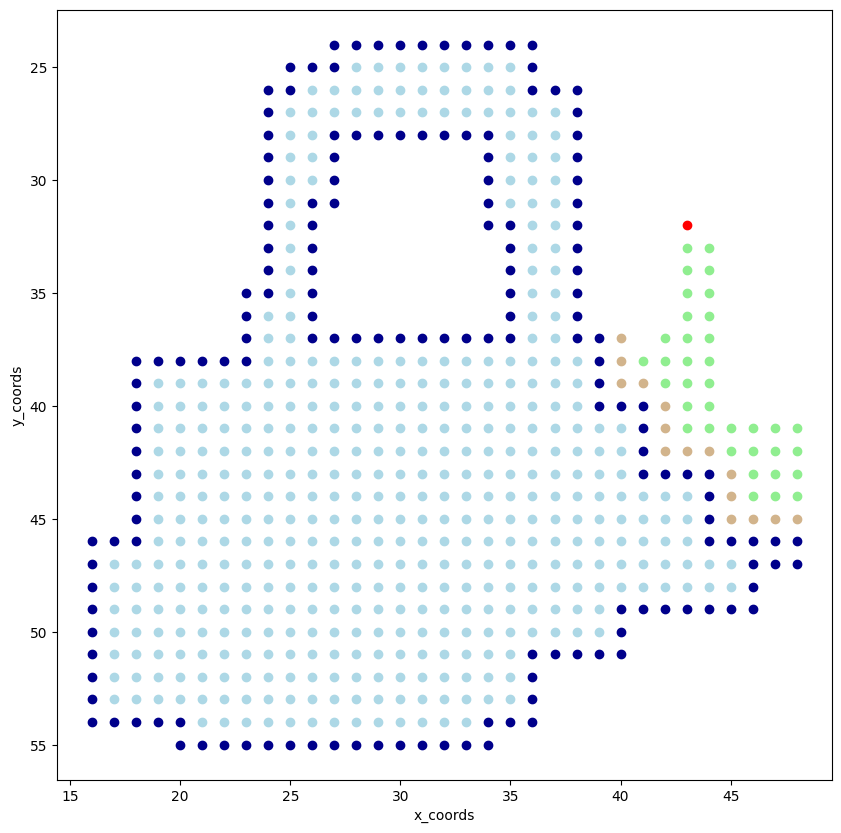

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel("coordinates.xlsx", index_col=0)

# 将'pc_in'的值更改为112
df = df.replace('pc_in', 112)

# 反转y轴
df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values > 0)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 根据值绘制散点图
for x, y in zip(x_coords, y_coords):
    value = df.loc[y, x]
    if np.isnan(value):
        color = 'black'
    elif value == 1:
        color = 'lightblue'
    elif value == 2:
        color = 'darkblue'
    elif value == 3:
        color = 'tan'
    elif value == 4:
        color = 'lightgreen'
    elif value == 112:
        color = 'red'
    else:
        color = 'black'  # 其他未知值为黑色
    plt.scatter(x, y, color=color)


# y轴反转
plt.gca().invert_yaxis()
# 设置坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


In [28]:
df = df.replace([np.nan, np.inf, -np.inf], 0)
df = df.astype(int)
df.to_csv('SOOTOPOLIS_CITY_coords_tracking.csv')

In [29]:
hex(2172166733824)

'0x1f9bf3a0000'